# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Calculate the PDF from a given dataset containing real-valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using Seaborn

## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [3]:
data = pd.read_csv('weight-height.csv')
male_df = data.loc[data['Gender'] == 'Male']
female_df = data.loc[data['Gender'] == 'Female']

print('Male Height mean:', male_df.Height.mean())
print('Male Height sd:', male_df.Height.std())   
print('Male Weight mean:', male_df.Weight.mean())
print('Male Weight sd:' ,male_df.Weight.std())   

print('Female Height mean:', female_df.Height.mean())
print('Female Height sd:' ,female_df.Height.std())   
print('Female Weight mean:', female_df.Weight.mean())
print('Female Weight sd:' ,female_df.Weight.std())   

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight sd: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height sd: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight sd: 19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

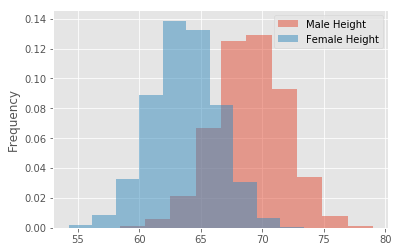

In [4]:
# Your code here
male_df.Height.plot.hist(bins = 10, density = True,  alpha = 0.5, label ="Male Height");
female_df.Height.plot.hist(bins = 10, density = True, alpha = 0.5, label = 'Female Height');
plt.legend()
plt.show();

In [18]:
# Record your observations - are these inline with your personal observations?
# The height of Men is generally higher than women, having the distribution with the higher values.
# Typical heights for men and women are between 60 and 70 inches, most values fall within this range.
# Male and Female height distributions appear normally distributed, with the Male distribution having slightly higher variance.
# These observations are inline with my personal observations.

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.hist()`
- The function should return two lists carrying x and y coordinates for plotting the density function

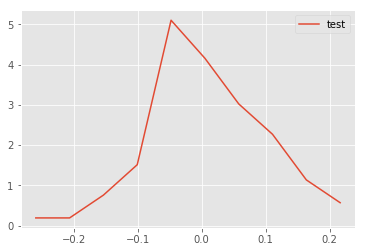

In [5]:
def density(x):
    
    n, bins = np.histogram(x, 10, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate histogram bins
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k] + bins[k+1])
        pdfy[k] = n[k]

    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x, y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

C:\Users\IBM\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\IBM\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


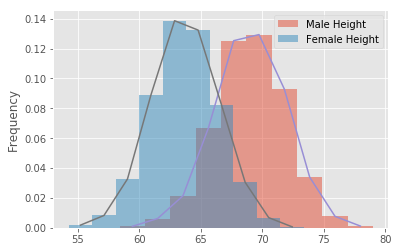

In [6]:
# You code here 
male_df.Height.plot.hist(bins = 10, normed = True,  alpha = 0.5, label ="Male Height");
female_df.Height.plot.hist(bins = 10, normed = True, alpha = 0.5, label = 'Female Height');
plt.legend()

x,y = density(male_df.Height)
plt.plot(x,y)

x,y = density(female_df.Height)
plt.plot(x,y)

plt.show();

## Repeat the above exercise for male and female weights

C:\Users\IBM\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\IBM\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


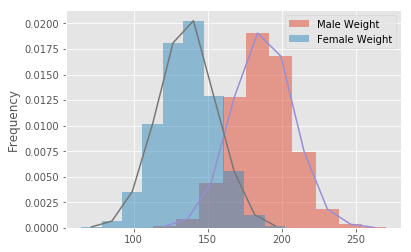

In [7]:
# Your code here 
male_df.Weight.plot.hist(bins = 10, normed = True,  alpha = 0.5, label ="Male Weight");
female_df.Weight.plot.hist(bins = 10, normed = True, alpha = 0.5, label = 'Female Weight');
plt.legend()

x,y = density(male_df.Weight)
plt.plot(x,y)

x,y = density(female_df.Weight)
plt.plot(x,y)

plt.show();

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?
# Similar to Height, Weight shows that men are generally heavier than women and that both distributions are normally distributed.
# Like Height, male Weight is also slightly more varied than female Weight.
# Typical weights for women are around 125 lbs and typical weights for men are around 175 lbs.

# What is the takeaway when comparing male and female heights and weights?

# Due to the smaller overlap, Weight is a better measurement to use when comparing males and females.

## Repeat the above experiments in seaborn and compare with your results

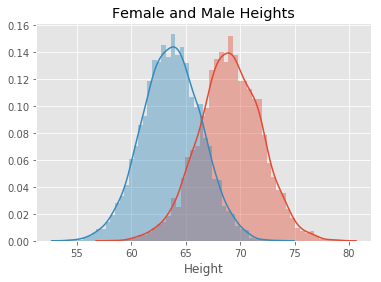

In [12]:
# Code for heights here
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Female and Male Heights')
plt.show()

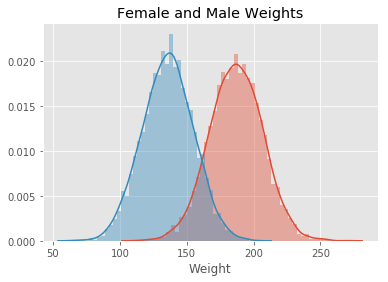

In [13]:
# Code for weights here
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Female and Male Weights')
plt.show()

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?
# The two approaches produce similar results. 
# There is an advantage for using Seaborn because of its default binning and density curve plotting. 
# As a result, the amount of code required is reduced.

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.